# Spam Text Classification

In second week of inzva Applied AI program, we are going to create a spam text classifier using RNN's. Our data have 2 columns. The first column is the label and the second column is text message itself. We are going to create our model using following techniques

- Embeddings
- SimpleRNN
- GRU
- LSTM
- Ensemble Model

### SimpleRNN

Simple RNN layer. Nothing special. The reason it is 'Simple' because it is not GRU nor LSTM layer. You can read the documentation from https://keras.io/api/layers/recurrent_layers/simple_rnn/

### LSTM

https://keras.io/api/layers/recurrent_layers/lstm/

We will use tokenization and padding to preprocess our data. We are going to create 3 different models and compare them.

## Libraries

In [2]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

Using TensorFlow backend.


## Dataset

In [3]:
data = pd.read_csv(".../datasets_2050_3494_SPAM text message 20170820 - Data.csv")

FileNotFoundError: [Errno 2] File .../datasets_2050_3494_SPAM text message 20170820 - Data.csv does not exist: '.../datasets_2050_3494_SPAM text message 20170820 - Data.csv'

Let's see the first 20 rows of our data and read the messages. What do you think, are they really look like spam messages?

In [3]:
data.iloc[0:20,:]

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Let's calculate spam and non-spam message counts.

In [4]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    texts.append(data['Message'][i])
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

texts = np.asarray(texts)
labels = np.asarray(labels)


print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [5]:
labels

array([0, 0, 1, ..., 0, 0, 0])

In [6]:
sum(labels==0)

4825

In [7]:
sum(labels==1)

747

### Data is imbalanced. Making it even more imbalanced by removing some of the spam messages and observing the model performance would be a good exercise to explore imbalanced dataset problem in Sequential Model context.

In [8]:
texts

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype='<U910')

## Data Preprocessing

Each sentence has different lengths. We need to have sentences of the same length. Besides, we need to represent them as integers.

As a concerete example, we have following sentences
- 'Go until jurong point crazy'
- 'any other suggestions'

First we will convert them to integers, this operation is known as Tokenizstion.

- [5, 10, 26, 67, 98]
- [7, 74, 107]

Now we have two integer vectors with different length. We need to make them have the same length. 

### Post Padding
- [5, 10, 26, 67, 98]
- [7, 74, 107, 0, 0]

### Pre Padding
- [5, 10, 26, 67, 98]
- [0, 0, 7, 74, 107]

But you don't have to use padding in each task. For details please refer to this link https://github.com/keras-team/keras/issues/2375

In [9]:
from keras.layers import SimpleRNN, Embedding, Dense, LSTM
from keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# number of words in our vocabulary 
max_features = 10000

# how many words from each document (max)?
maxlen = 500

## Train - Test Split

We will take a simple approach and create only train and test sets. Of course having train, test and validation sets is the best practise.

In [10]:
training_samples = int(len(labels)*0.8)

In [11]:
training_samples

4457

In [12]:
validation_samples = int(5572 - training_samples)

In [13]:
assert len(labels) == (training_samples + validation_samples), "Not equal!"

In [14]:
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

The number of training 4457, validation 1115 


## Tokenization

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Found {0} unique words: ".format(len(word_index)))

Found 9004 unique words: 


In [16]:
#data = pad_sequences(sequences, maxlen=maxlen, padding='post')
data = pad_sequences(sequences, maxlen=maxlen)

In [17]:
print(data.shape)

(5572, 500)


In [18]:
data

array([[   0,    0,    0, ...,   58, 4427,  144],
       [   0,    0,    0, ...,  472,    6, 1940],
       [   0,    0,    0, ...,  660,  391, 2994],
       ...,
       [   0,    0,    0, ...,  107,  250, 9003],
       [   0,    0,    0, ...,  198,   12,   47],
       [   0,    0,    0, ...,    2,   61,  267]], dtype=int32)

In [19]:
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]


texts_train = data[:training_samples]
y_train = labels[:training_samples]
texts_test = data[training_samples:]
y_test = labels[training_samples:]

## Model Creation

We will create 3 different models and compare their performances. One model will use SimpleRNN layer, the other will use GRU layer and the last one will use LSTM layer. Architecture of each model is the same. We can create deeper models but we already get good results.

In [20]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
             metrics=['acc'])

history_rnn = model.fit(texts_train, y_train, epochs=10,
                       batch_size=60, validation_split=0.2)

/opt/anaconda3/envs/scoutium_standardization/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 6s 2ms/step - loss: 0.2755 - acc: 0.9128 - val_loss: 0.1220 - val_acc: 0.9664
Epoch 2/10
3565/3565 [==============================] - 5s 1ms/step - loss: 0.0861 - acc: 0.9792 - val_loss: 0.0643 - val_acc: 0.9787
Epoch 3/10
3565/3565 [==============================] - 6s 2ms/step - loss: 0.0432 - acc: 0.9888 - val_loss: 0.0464 - val_acc: 0.9888
Epoch 4/10
3565/3565 [==============================] - 5s 2ms/step - loss: 0.0433 - acc: 0.9868 - val_loss: 0.0903 - val_acc: 0.9742
Epoch 5/10
3565/3565 [==============================] - 6s 2ms/step - loss: 0.3418 - acc: 0.8645 - val_loss: 0.1212 - val_acc: 0.9664
Epoch 6/10
3565/3565 [==============================] - 6s 2ms/step - loss: 0.0835 - acc: 0.9689 - val_loss: 0.1333 - val_acc: 0.9596
Epoch 7/10
3565/3565 [==============================] - 6s 2ms/step - loss: 0.0676 - acc: 0.9773 - val_loss: 0.1532 - val_acc: 0.9496
Epoch 8/10
3565

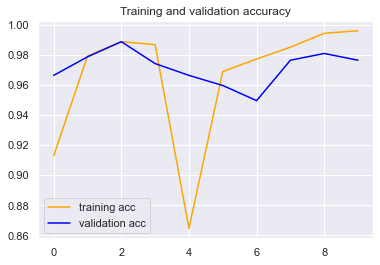

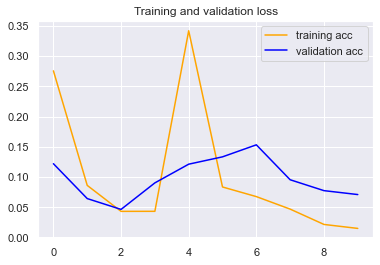

In [21]:
acc = history_rnn.history['acc']
val_acc = history_rnn.history['val_acc']
loss = history_rnn.history['loss']
val_loss = history_rnn.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_rnn = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

1115/1115 [==============================] - 1s 517us/step
Test loss is 0.08 accuracy is 0.98  
[[952  15]
 [  9 139]]


In [24]:
sum(y_test==1)

154

## GRU

In [25]:
from keras.layers import GRU

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
             metrics=['acc'])

history_rnn = model.fit(texts_train, y_train, epochs=10,
                       batch_size=60, validation_split=0.2)

/opt/anaconda3/envs/scoutium_standardization/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 15s 4ms/step - loss: 0.3313 - acc: 0.8783 - val_loss: 0.1370 - val_acc: 0.9484
Epoch 2/10
3565/3565 [==============================] - 14s 4ms/step - loss: 0.0822 - acc: 0.9784 - val_loss: 0.0575 - val_acc: 0.9821
Epoch 3/10
3565/3565 [==============================] - 15s 4ms/step - loss: 0.0390 - acc: 0.9902 - val_loss: 0.0405 - val_acc: 0.9854
Epoch 4/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.0240 - acc: 0.9924 - val_loss: 0.0404 - val_acc: 0.9865
Epoch 5/10
3565/3565 [==============================] - 13s 4ms/step - loss: 0.0158 - acc: 0.9955 - val_loss: 0.0436 - val_acc: 0.9843
Epoch 6/10
3565/3565 [==============================] - 14s 4ms/step - loss: 0.0110 - acc: 0.9975 - val_loss: 0.0500 - val_acc: 0.9854
Epoch 7/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.0070 - acc: 0.9980 - val_loss: 0.0562 - val_acc: 0.9843
Epoch 8/

In [ ]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_gru = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

## LSTM

In [124]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history_lstm = model.fit(texts_train, y_train, epochs=10,
                        batch_size=60, validation_split=0.2)

Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 14s 4ms/step - loss: 0.4153 - acc: 0.8659 - val_loss: 0.4246 - val_acc: 0.8509
Epoch 2/10
3565/3565 [==============================] - 11s 3ms/step - loss: 0.3815 - acc: 0.8715 - val_loss: 0.4236 - val_acc: 0.8509
Epoch 3/10
3565/3565 [==============================] - 12s 3ms/step - loss: 0.3667 - acc: 0.8715 - val_loss: 0.4225 - val_acc: 0.8509
Epoch 4/10
 780/3565 [=====>........................] - ETA: 8s - loss: 0.3600 - acc: 0.8577

KeyboardInterrupt: 

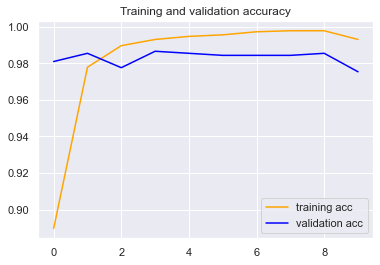

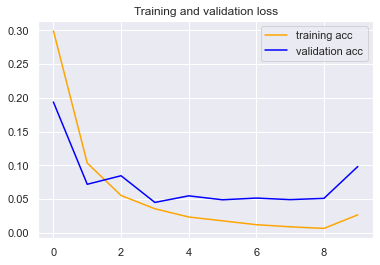

In [35]:
acc = history_lstm.history['acc']
val_acc = history_lstm.history['val_acc']
loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training acc')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation acc')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [36]:
pred = model.predict_classes(texts_test)
acc = model.evaluate(texts_test, y_test)
proba_ltsm = model.predict_proba(texts_test)
from sklearn.metrics import confusion_matrix
print("Test loss is {0:.2f} accuracy is {1:.2f}  ".format(acc[0],acc[1]))
print(confusion_matrix(pred, y_test))

1115/1115 [==============================] - 1s 732us/step
Test loss is 0.09 accuracy is 0.98  
[[953  13]
 [  8 141]]


## Ensemble Model

In [38]:
ensemble_proba = 0.25 * proba_rnn + 0.35 * proba_gru + 0.4 * proba_lstm
ensemble_proba[:5]

array([[0.00236558],
       [0.00050916],
       [0.00035959],
       [0.00019107],
       [0.00014903]], dtype=float32)

In [60]:
ensemble_class = np.array([1 if i >= 0.3 else 0 for i in ensemble_proba])

In [61]:
print(confusion_matrix(ensemble_class, y_test))


[[948   8]
 [ 13 146]]
